# Natural Computing - Assignment 2 
Group 13

In [1]:
import os
import subprocess
import numpy as np
import matplotlib.pyplot as plt

## Set working directory

In [2]:
def run_java_command(command, print_output=False):
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if print_output:
        print("Command:", command)
        print("Error:", result.stderr.strip())
        print("Output:", result.stdout.strip())
    return result.stdout.strip()

#set the input path to the negative-selection folder
INPUT_PATH = '/Users/ringo/Library/CloudStorage/GoogleDrive-jasperpieterse12@gmail.com/Other computers/Desktop/Desktop/Physicss/Natural Computing/Natural-Computing/Assignment 2/negative-selection/'

#intialize working directory
run_java_command(f"cd '{INPUT_PATH}'", print_output = True)

Command: cd '/Users/ringo/Library/CloudStorage/GoogleDrive-jasperpieterse12@gmail.com/Other computers/Desktop/Desktop/Physicss/Natural Computing/Natural-Computing/Assignment 2/negative-selection/'
Error: 
Output: 


''

### Define Helper Functions

In [3]:
# Function to compute the sensitivity and specificity between two languages
def compute_sens_spec_lang(language1, language2): 
    '''
    This function computes the sensitivity and specificity between two languages.

    '''
    # Combine predictions and labels
    data = np.hstack([
        np.array([predictions_lang1, labels_lang1 * len(predictions_lang1)]),
        np.array([predictions_lang2, labels_lang2 * len(predictions_lang2)])
    ])

    # Sort data by predictions 
    data = data[:, np.argsort(data[0, :])]

    # Determine unique prediction values for cutoff points
    cutoff_points = np.unique(data[0, :])
    cutoff_points = np.append(cutoff_points, max(cutoff_points) + 1)

    sensitivity = []
    specificity = []

    for cutoff_point in cutoff_points:
        index = np.where(data[0, :] == cutoff_point)[0]
        if not index.size:  # Handle cases with no matching prediction value
            index = [data.shape[1]]

        true_positives = (data[1, index[0]:] == 1).sum()
        true_negatives = (data[1, :index[0]] == 0).sum()

        sensitivity.append(true_positives / (data[1] == 1).sum())
        specificity.append(true_negatives / (data[1] == 0).sum())

    return sensitivity, specificity


def compute_sensitivity_specificity(predictions_lang1, predictions_lang2, labels_lang1=[0], labels_lang2=[1]):
    """
    Calculates sensitivity and specificity for distinguishing two languages based on predictions.

    """

    # Combine predictions and labels
    data = np.hstack([
        np.array([predictions_lang1, labels_lang1 * len(predictions_lang1)]),
        np.array([predictions_lang2, labels_lang2 * len(predictions_lang2)])
    ])

    # Sort data by predictions 
    data = data[:, np.argsort(data[0, :])]

    # Determine unique prediction values for cutoff points
    cutoff_points = np.unique(data[0, :])
    cutoff_points = np.append(cutoff_points, max(cutoff_points) + 1)

    sensitivity = []
    specificity = []

    for cutoff_point in cutoff_points:
        index = np.where(data[0, :] == cutoff_point)[0]
        if not index.size:  # Handle cases with no matching prediction value
            index = [data.shape[1]]

        true_positives = (data[1, index[0]:] == 1).sum()
        true_negatives = (data[1, :index[0]] == 0).sum()

        sensitivity.append(true_positives / (data[1] == 1).sum())
        specificity.append(true_negatives / (data[1] == 0).sum())

    return sensitivity, specificity


def calculate_AUC(x_coords, y_coords):
    """Calculates the area under the curve defined by the points (x_coords, y_coords)
    using the trapezoidal rule.
    """

    area = 0
    for i in range(1, len(x_coords)):
        delta_x = x_coords[i] - x_coords[i - 1]
        average_height = (y_coords[i - 1] + y_coords[i]) / 2
        area += delta_x * average_height

    return area


## Language Experiment

AUC SCORE FOR r = 1 IS:  0.5435347184253692
AUC SCORE FOR r = 2 IS:  0.7396459814106062
AUC SCORE FOR r = 4 IS:  0.7916097138691455


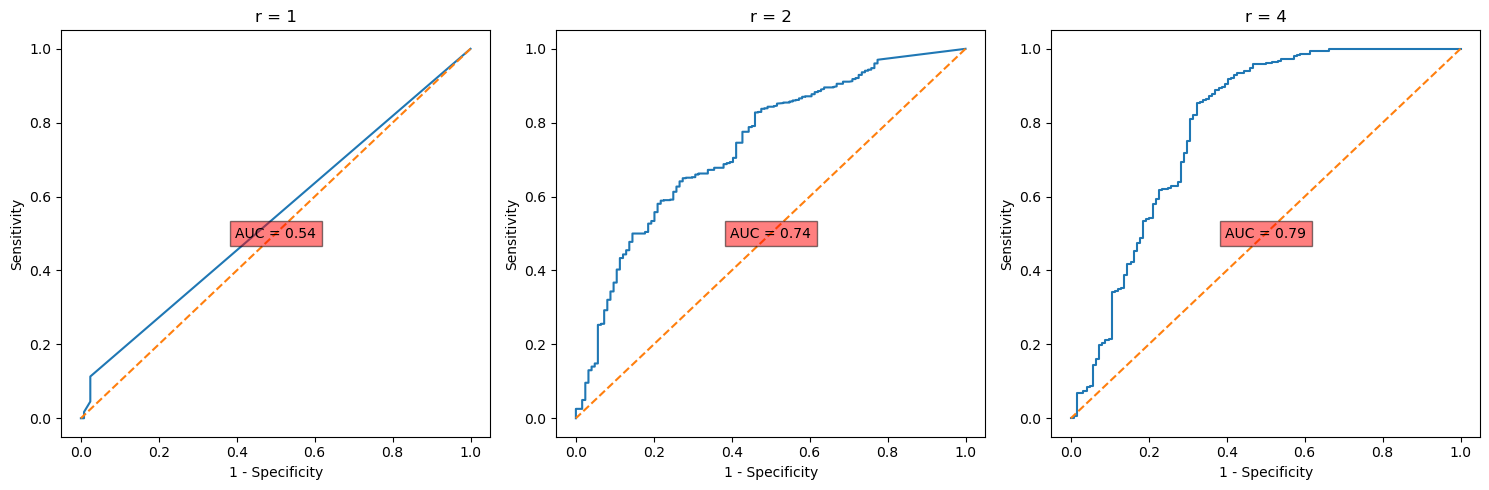

In [4]:
# making the subplot for 3 values of r
r_values = [1, 2, 4]
AUC_values = []
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, r in enumerate(r_values):
    # Run Java commands and capture output
    output_english_test = run_java_command(f"java -jar negsel2.jar -self english.train -n 10 -r {r} -c  < english.test")
    output_tagalog_test = run_java_command(f"java -jar negsel2.jar -self english.train -n 10 -r {r} -c  < tagalog.test")

    # Process output into numerical values
    english_test_values = list(map(float, output_english_test.split()))
    tagalog_test_values = list(map(float, output_tagalog_test.split()))

    # Calculating Selectivity and Specificity
    sensitivity, specificity = compute_sensitivity_specificity(english_test_values, tagalog_test_values)

    # Calculate AUC
    auc_score = calculate_AUC(np.asarray(specificity), sensitivity) 
    AUC_values.append(auc_score)
    print(f"AUC SCORE FOR r = {r} IS: ", auc_score)

    # Plot
    axs[i].plot(1-np.asarray(specificity), sensitivity)
    axs[i].plot(1-np.asarray(specificity), 1-np.asarray(specificity), '--')
    axs[i].set_xlabel("1 - Specificity")
    axs[i].set_ylabel("Sensitivity")
    axs[i].set_title(f"r = {r}")
    axs[i].text(0.5, 0.5, f"AUC = {auc_score:.2f}", horizontalalignment='center', verticalalignment='center', transform=axs[i].transAxes, bbox=dict(facecolor='red', alpha=0.5))

plt.tight_layout()
plt.savefig("Curves.png")
plt.show()

AUC SCORE FOR r = 1 IS:  0.5435347184253692
AUC SCORE FOR r = 2 IS:  0.7396459814106062
AUC SCORE FOR r = 3 IS:  0.8311235647895026
AUC SCORE FOR r = 4 IS:  0.7916097138691455
AUC SCORE FOR r = 5 IS:  0.7282440313468197
AUC SCORE FOR r = 6 IS:  0.6680847913249499
AUC SCORE FOR r = 7 IS:  0.5907258064516129
AUC SCORE FOR r = 8 IS:  0.5201612903225806
AUC SCORE FOR r = 9 IS:  0.5120967741935484


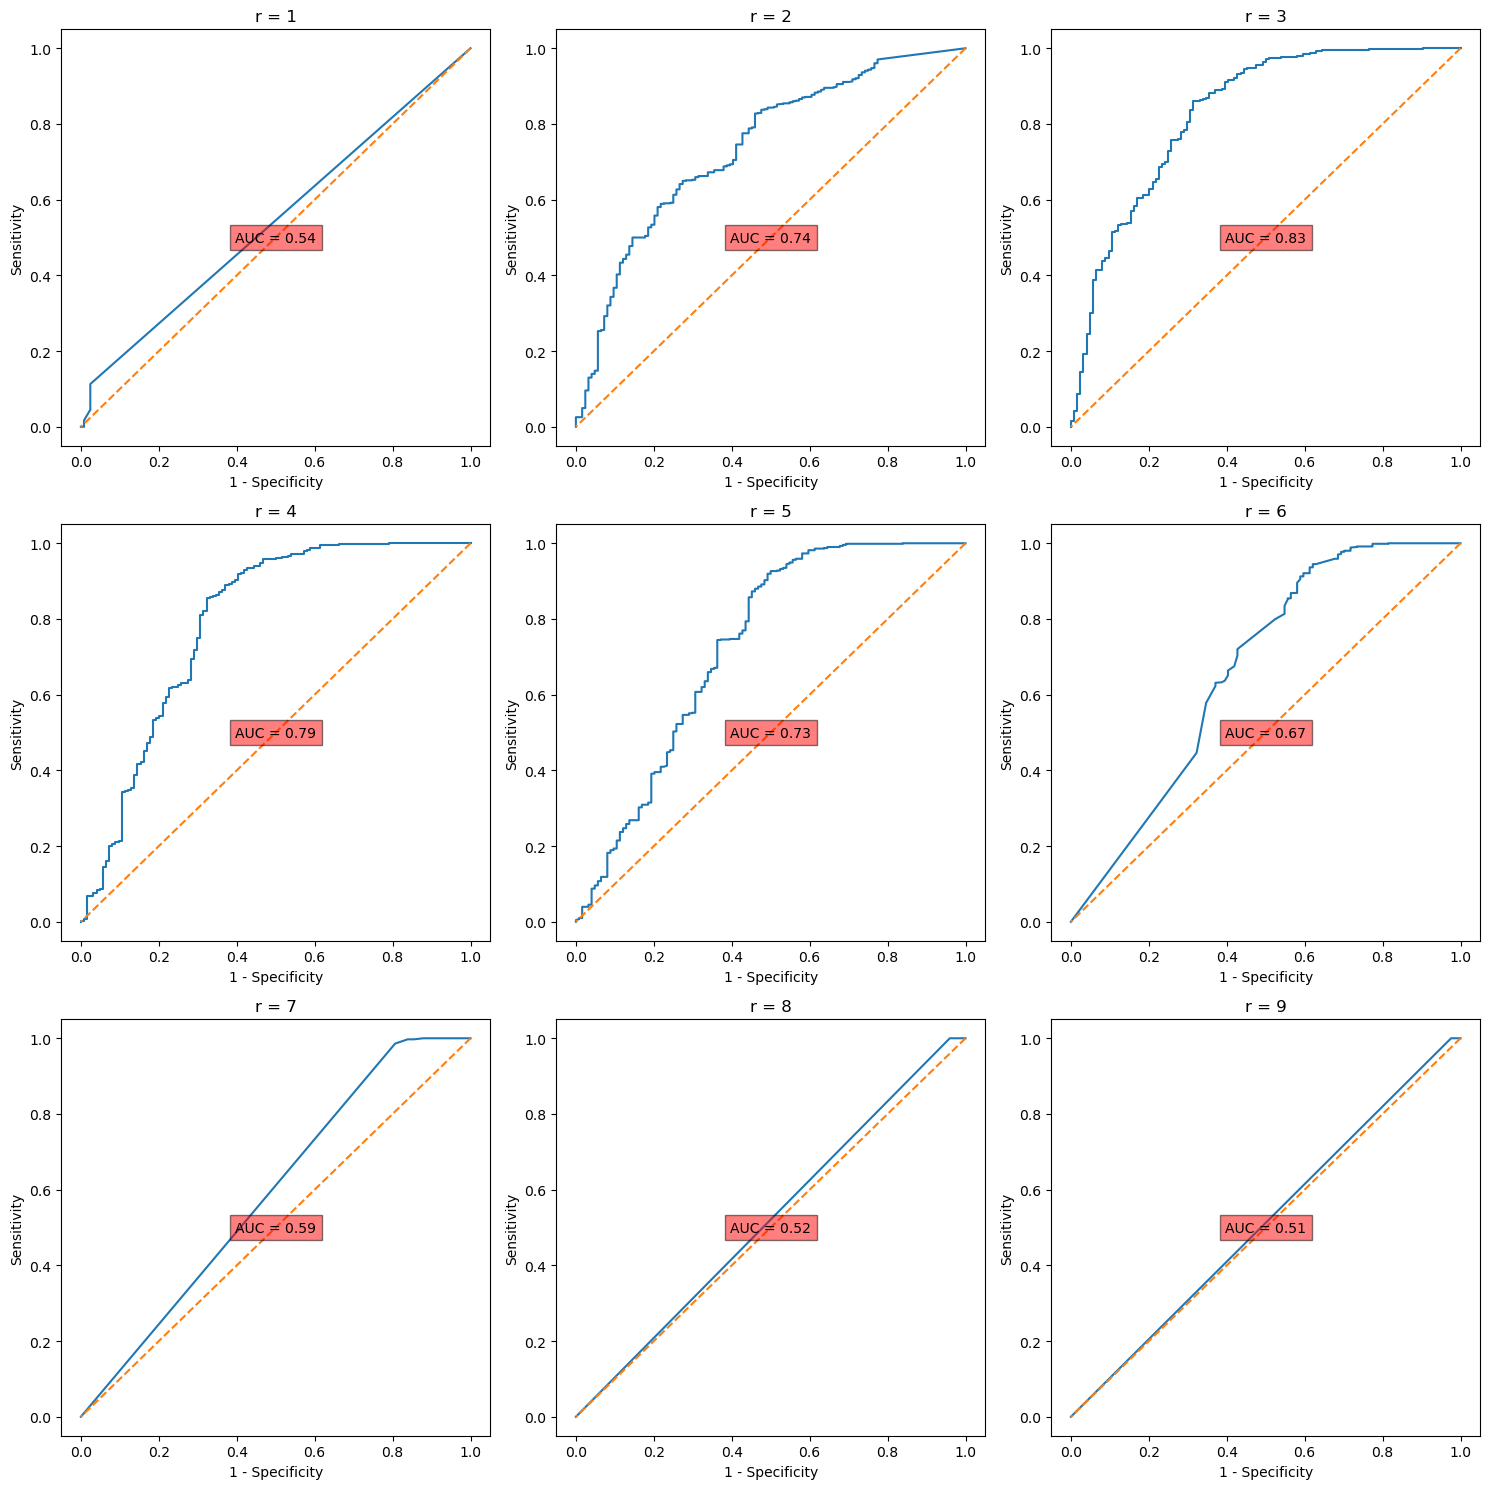

In [5]:
# making the subplot for 9 values of r
r_values = list(range(1, 10))
AUC_values = []
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i, r in enumerate(r_values):
    # Train the data
    training_command = f"java -jar negsel2.jar -alphabet file://english.train -self english.train -n 10 -r {r} -c"
    run_java_command(training_command)

    # Run Java commands and capture output
    output_english_test = run_java_command(f"java -jar negsel2.jar -self english.train -n 10 -r {r} -c -l < english.test")
    output_tagalog_test = run_java_command(f"java -jar negsel2.jar -self english.train -n 10 -r {r} -c -l < tagalog.test")

    # Process output into numerical values
    english_test_values = list(map(float, output_english_test.split()))
    tagalog_test_values = list(map(float, output_tagalog_test.split()))

    # Calculating Selectivity and Specificity
    sensitivity, specificity = compute_sensitivity_specificity(english_test_values, tagalog_test_values)

    # Calculate AUC
    auc_score = calculate_AUC(np.asarray(specificity), sensitivity) 
    AUC_values.append(auc_score)
    print(f"AUC SCORE FOR r = {r} IS: ", auc_score)

    # Plot
    axs[i//3, i%3].plot(1-np.asarray(specificity), sensitivity)
    axs[i//3, i%3].plot(1-np.asarray(specificity), 1-np.asarray(specificity), '--')
    axs[i//3, i%3].set_xlabel("1 - Specificity")
    axs[i//3, i%3].set_ylabel("Sensitivity")
    axs[i//3, i%3].set_title(f"r = {r}")
    axs[i//3, i%3].text(0.5, 0.5, f"AUC = {auc_score:.2f}", horizontalalignment='center', verticalalignment='center', transform=axs[i//3, i%3].transAxes, bbox=dict(facecolor='red', alpha=0.5))

plt.tight_layout()
plt.savefig("Curves_9.png")
plt.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[0.5435347184253692, 0.7396459814106062, 0.8311235647895026, 0.7916097138691455, 0.7282440313468197, 0.6680847913249499, 0.5907258064516129, 0.5201612903225806, 0.5120967741935484]


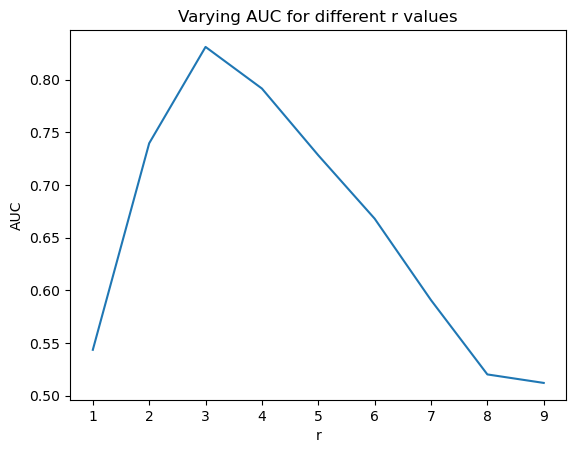

In [6]:
print(r_values)
print(AUC_values)

plt.plot(r_values, AUC_values)
plt.xlabel("r")
plt.ylabel("AUC")
plt.title("Varying AUC for different r values")
plt.show()

AUC SCORE for hiligaynon IS:  0.8397419354838703
AUC SCORE for middle-english IS:  0.5424435483870965
AUC SCORE for plautdietsch IS:  0.7746774193548389
AUC SCORE for xhosa IS:  0.8893387096774199


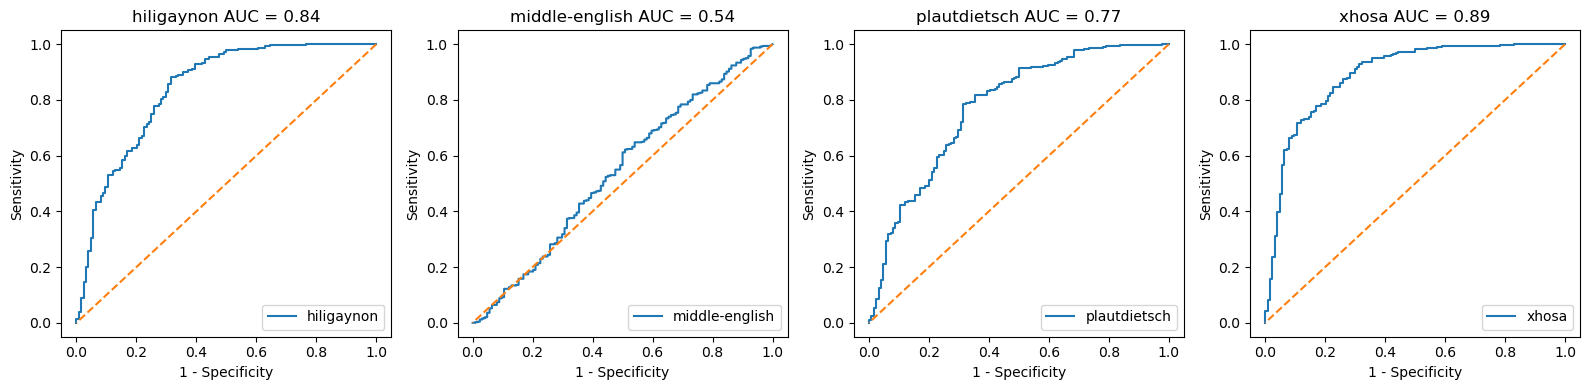

In [7]:
# Loading the other languages as well
languages = ["hiligaynon", "middle-english", "plautdietsch", "xhosa"]
r = 3

all_sensitivity = []
all_specificity = []

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

for i, lang in enumerate(languages):
    training_command = f"java -jar negsel2.jar -alphabet file://english.train -self english.train -n 10 -r {r} -c"
    run_java_command(training_command)
    
    # Run Java commands and capture output
    output_english_test = run_java_command(f"java -jar negsel2.jar -self english.train -n 10 -r {r} -c -l < english.test")
    output_lang_test = run_java_command(f"java -jar negsel2.jar -self english.train -n 10 -r {r} -c -l < lang/{lang}.txt")

    # Process output into numerical values
    english_test_values = list(map(float, output_english_test.split()))
    lang_test_values = list(map(float, output_lang_test.split()))

    # Calculating Selectivity and Specificity
    sensitivity, specificity = compute_sensitivity_specificity(english_test_values, lang_test_values)
    all_sensitivity.append(sensitivity)
    all_specificity.append(specificity)

    # Calculate AUC
    auc_score = calculate_AUC(np.asarray(specificity), sensitivity) 

    print(f"AUC SCORE for {lang} IS: ", auc_score)
    
    # Plotting
    axs[i].plot(1-np.asarray(specificity), sensitivity, label=f"{lang}")
    axs[i].plot(1-np.asarray(specificity), 1-np.asarray(specificity), '--')
    axs[i].set_xlabel("1 - Specificity")
    axs[i].set_ylabel("Sensitivity")
    axs[i].legend(loc="lower right")
    axs[i].set_title(f"{lang} AUC = {auc_score:.2f}")

plt.tight_layout()
plt.savefig("other_languages.png")  
plt.show()

# Linux Experiment

### Preprocessing functions


In [16]:
def extract_train_data(train_file_path, output_file_path, chunk_length=10):
    """
    Reads system calls from a file, extracts non-overlapping chunks of a given length, 
    and writes them to an output file (one chunk per line).
    """
    with open(train_file_path) as file:
        lines = file.read().splitlines()

    all_chunks = []
    for line in lines:
        if len(line) < chunk_length:
            chunk = line.ljust(chunk_length, '-')  # Pad short lines
            all_chunks.append(chunk)
        else:  
            for start_index in range(0, len(line) - chunk_length + 1, chunk_length):  #Create non-overlapping chunks
                end_index = start_index + chunk_length
                if end_index <= len(line): 
                    chunk = line[start_index:end_index]
                else:  # Case when the chunk extends beyond the word
                    chunk = line[start_index:]  # Take the remaining part
                    chunk = chunk.ljust(chunk_length, '-')  # Pad with '-'

                all_chunks.append(chunk) 

    with open(output_file_path, 'w') as output_file:  # Open output file in write mode
        for chunk in all_chunks:
            output_file.write(chunk + '\n')  # Write each chunk followed by a newline

    return np.asarray(all_chunks)

def extract_test_data(test_file_path, label_file_path, chunk_length=10):
    """
    Reads system calls from a test file, extracts non-overlapping chunks, and
    collects corresponding labels and syscall identifiers.
    """
    # Read system calls from the test file
    with open(test_file_path, 'r') as file:
        test_lines = file.read().splitlines()

    # Read labels from the label file
    with open(label_file_path, 'r') as file:
        labels = file.read().splitlines()

    all_chunks = []
    syscall_ids = [] 

    for line_index, line in enumerate(test_lines): 
        # Handle short lines directly
        if len(line) < chunk_length:
            chunk = line.ljust(chunk_length, '-')  # Pad short lines
            all_chunks.append(chunk)
            syscall_ids.append(line_index)
        else:  
            for start_index in range(0, len(line) - chunk_length + 1, chunk_length):
                end_index = start_index + chunk_length
                if end_index <= len(line): 
                    chunk = line[start_index:end_index]
                else: 
                    chunk = line[start_index:] 
                    chunk = chunk.ljust(chunk_length, '-') 

                if chunk.strip('-'): 
                    all_chunks.append(chunk) 
                    syscall_ids.append(line_index)

    return np.asarray(all_chunks), np.asarray(syscall_ids), np.asarray(labels, dtype=int)

In [5]:
def calculate_sensitivity_specificity_linux(positive_scores, negative_scores):
  # Combine scores and sort by ascending values of the first row
  combined_data = np.vstack([positive_scores, negative_scores])
  combined_data = combined_data[:, np.argsort(combined_data[0, :])]

  # Get unique thresholds and add a value beyond the maximum
  unique_thresholds = np.unique(combined_data[0, :])
  thresholds = np.append(unique_thresholds, max(unique_thresholds) + 1)

  sensitivity_list = []
  specificity_list = []

  for threshold in thresholds:
    # Find indices where the score matches the threshold
    matching_indices = np.where(combined_data[0, :] == threshold)[0]

    # Handle cases where no scores match the threshold
    if len(matching_indices) == 0:
      matching_indices = [combined_data.shape[1]]  # Use the end of the data

    # Calculate true positives, false negatives, true negatives, false positives  
    true_positives = np.sum(combined_data[1, matching_indices[0]:] == 1)
    false_negatives = np.sum(combined_data[1] == 1) - true_positives
    true_negatives = np.sum(combined_data[1, :matching_indices[0]] == 0)
    false_positives = np.sum(combined_data[1] == 0) - true_negatives

    # Calculate sensitivity and specificity (avoid division by zero)
    if true_positives + false_negatives != 0:
      sensitivity = true_positives / (true_positives + false_negatives)
    else:
      sensitivity = 0

    if true_negatives + false_positives != 0:
      specificity = true_negatives / (true_negatives + false_positives)
    else:
      specificity = 0

    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)

  return sensitivity_list, specificity_list


[0.0, 20.935195675083463, 0.0, 8.377954002594889, 0.0, 12.606204488532383, 12.654027430641216, 0.0, 0.0, 0.0, 12.790518765726805, 0.0, 0.0, 14.043762082737434, 21.14854649173792, 29.34189219627397, 21.307973082169813, 4.059003313985751, 0.0, 12.604993690575256, 0.0, 0.0, 29.183396513875362, 0.0, 0.0, 0.0, 29.862343634671454, 25.177470647947633, 0.0, 0.0, 25.227296618130573, 0.0, 0.0, 0.0, 29.532572767358204, 0.0, 20.918802613410016, 40.537409638328775, 0.0, 29.772335453039613, 0.0, 0.0, 0.0, 25.117660133203504, 0.0, 16.864970354009362, 0.0, 0.0, 0.0, 0.0, 12.726883441818922, 25.25319350307439, 4.059003313985751, 0.0, 24.945463858733742, 20.86363868090671, 16.933017730361463, 0.0, 0.0, 4.256842237240005, 0.0, 25.117660133203504, 29.842263553524237, 0.0, 0.0, 0.0, 42.35196256222791, 12.626743965009092, 0.0, 20.857496126054183, 43.339609627031734, 4.155489179392837, 25.252001876183165, 0.0, 0.0, 25.484795671150096, 2.447457730708086, 0.0, 0.0, 17.02731104496159, 33.899348304432806, 17.314

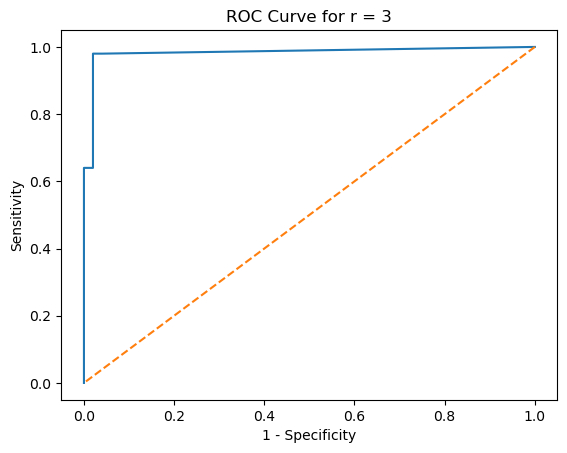

In [17]:
# Set parameters
n = 10
r = 3
test_set_nr = 1

# Pre-process the training data
train_file = f'{INPUT_PATH}syscalls/snd-cert/snd-cert.train' #change / to \\ for Windows
preprocessed_train_file = 'snd-cert_preprocessed.train'
train_chunks = extract_train_data(train_file, preprocessed_train_file, chunk_length = n)

# Pre-process the test data
test_file = f'{INPUT_PATH}syscalls/snd-cert/snd-cert.{test_set_nr}.test' #change / to \\ for Windows
label_file = f'{INPUT_PATH}syscalls/snd-cert/snd-cert.{test_set_nr}.labels' #change / to \\ for Windows
test_chunks, syscall_ids, labels = extract_test_data(test_file, label_file, chunk_length = n)

# Define training command
training_command = f"java -jar negsel2.jar -alphabet file://syscalls/snd-cert/snd-cert.alpha -self {preprocessed_train_file} -n {n} -r {r} -c -l"

# Compute the mean anomaly score for each system call
mean_predictions = []
for i in range(max(syscall_ids)+1):
    # Select all chunks belonging to a single system call
    selected_chunks = test_chunks[syscall_ids == i]
    
    # Save selected chunks to a file, one chunk per line, such that it can be used as input for negative selection
    with open(f'{INPUT_PATH}test.test','w') as file:
        file.write('\n'.join(selected_chunks))
    
    # Perform negative selection
    pred_raw = run_java_command(f"{training_command} < test.test")
    pred = list(map(float, pred_raw.split()))
    
    # Compute average anomaly score of that line
    mean_predictions.append(np.mean(pred))

#Get the sensitivity and specificity
sensitivity, specificity = calculate_sensitivity_specificity_linux(mean_predictions, labels)

#Calculate the AUC
auc_score = calculate_AUC(np.asarray(specificity), sensitivity) 
print(f"AUC score: {auc_score:.4f}")

#Plot the ROC curve
plt.plot(1-np.asarray(specificity), sensitivity)
plt.plot(1-np.asarray(specificity), 1-np.asarray(specificity), '--')
plt.xlabel("1 - Specificity")
plt.ylabel("Sensitivity")
plt.title(f"ROC Curve for r = {r}")
plt.show()

### Grid search over n and r 

AUC score: 0.98
AUC score: 0.98
AUC score: 0.98
AUC score: 0.98
AUC score: 0.98
AUC score: 0.98
AUC score: 0.97
AUC score: 0.99
AUC score: 0.99


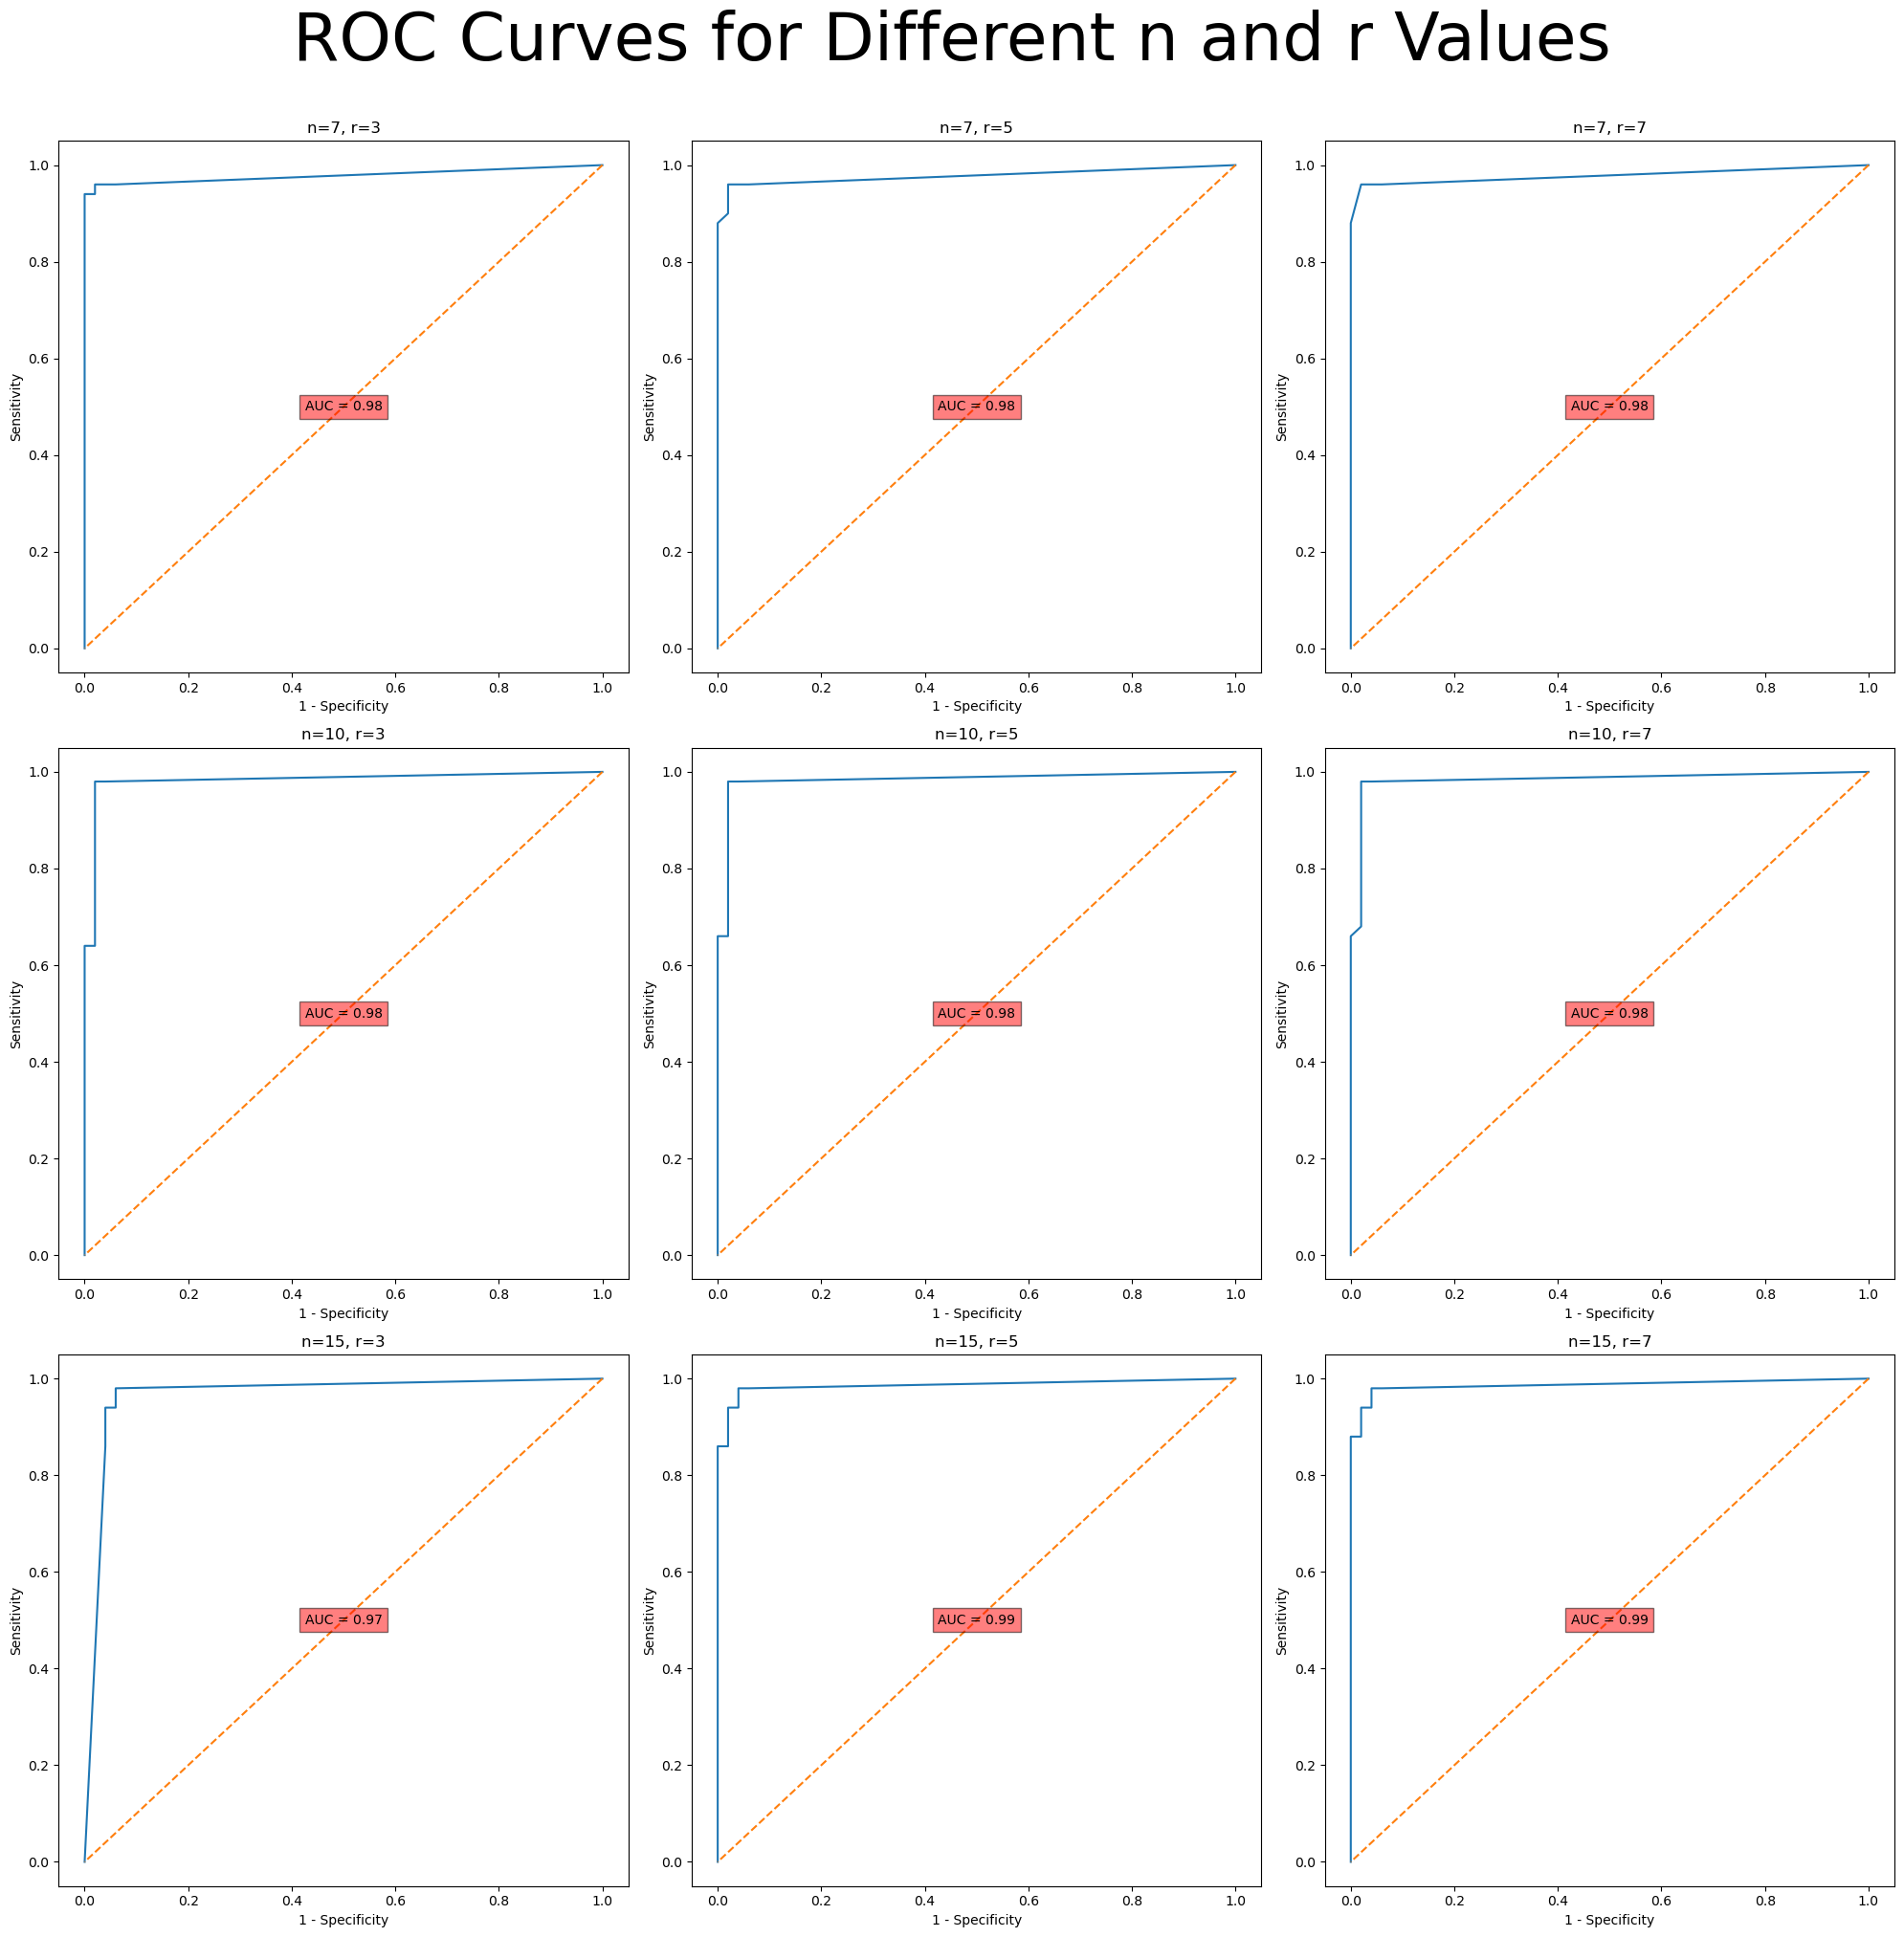

In [18]:
# Parameter Setup
n_values = [7, 10, 15]
r_values = [3, 5, 7]
test_set_nr = 1  

# Result Tracking
all_auc_scores = []  # Stores AUC scores for each (n, r) combination

# Grid Search
fig, axs = plt.subplots(len(n_values), len(r_values), figsize=(20, 20))  # Adjust subplot size if needed
plot_nr = 0  # Counter for tracking subplot positions 

for n in n_values:
    for r in r_values:
        # Pre-process the training data
        train_file = f'{INPUT_PATH}syscalls/snd-cert/snd-cert.train' #change / to \\ for Windows
        preprocessed_train_file = 'snd-cert_preprocessed.train'
        train_chunks = extract_train_data(train_file, preprocessed_train_file, chunk_length = n)

        # Pre-process the test data
        test_file = f'{INPUT_PATH}syscalls/snd-cert/snd-cert.{test_set_nr}.test' #change / to \\ for Windows
        label_file = f'{INPUT_PATH}syscalls/snd-cert/snd-cert.{test_set_nr}.labels' #change / to \\ for Windows
        test_chunks, syscall_ids, labels = extract_test_data(test_file, label_file, chunk_length = n)

        # Define training command
        training_command = f"java -jar negsel2.jar -alphabet file://syscalls/snd-cert/snd-cert.alpha -self {preprocessed_train_file} -n {n} -r {r} -c -l"

        # Compute the mean anomaly score for each system call
        mean_predictions = []
        for i in range(max(syscall_ids)+1):
            # Select all chunks belonging to a single system call
            selected_chunks = test_chunks[syscall_ids == i]

            # Save selected chunks to a file, one chunk per line, such that it can be used as input for negative selection
            with open(f'{INPUT_PATH}test.test','w') as file:
                file.write('\n'.join(selected_chunks))

            # Perform negative selection
            pred_raw = run_java_command(f"{training_command} < test.test")
            pred = list(map(float, pred_raw.split()))

            # Compute average anomaly score of that line
            mean_predictions.append(np.mean(pred))


        #Get the sensitivity and specificity
        sensitivity, specificity = calculate_sensitivity_specificity_linux(mean_predictions, labels)

        #Calculate and store the AUC
        auc_score = calculate_AUC(np.asarray(specificity), sensitivity) 
        print(f"AUC score: {auc_score:.2f}")
        all_auc_scores.append(auc_score) 

        # Plot ROC Curve on Subplot
        row = plot_nr // len(r_values)
        col = plot_nr % len(r_values)
        
        axs[row, col].plot(1 - np.asarray(specificity), sensitivity)
        axs[row, col].plot(1-np.asarray(specificity), 1-np.asarray(specificity), '--')
        axs[row, col].set_xlabel("1 - Specificity")
        axs[row, col].set_ylabel("Sensitivity")
        axs[row, col].set_title(f"n={n}, r={r}")
        axs[row, col].text(0.5, 0.5, f"AUC = {auc_score:.4f}", horizontalalignment='center', verticalalignment='center', transform=axs[row, col].transAxes, bbox=dict(facecolor='red', alpha=0.5))

        plot_nr += 1

# Overall plot settings
fig.suptitle('ROC Curves for Different n and r Values', y = 0.99, size = 50)
plt.tight_layout()  # Helps prevent labels from overlapping
plt.savefig("syscalls_grid_search1.png")  # Save the combined figure
plt.show()

AUC score: 0.69
AUC score: 0.92
AUC score: 0.95
AUC score: 0.70
AUC score: 0.94
AUC score: 0.96
AUC score: 0.77
AUC score: 0.92
AUC score: 0.94


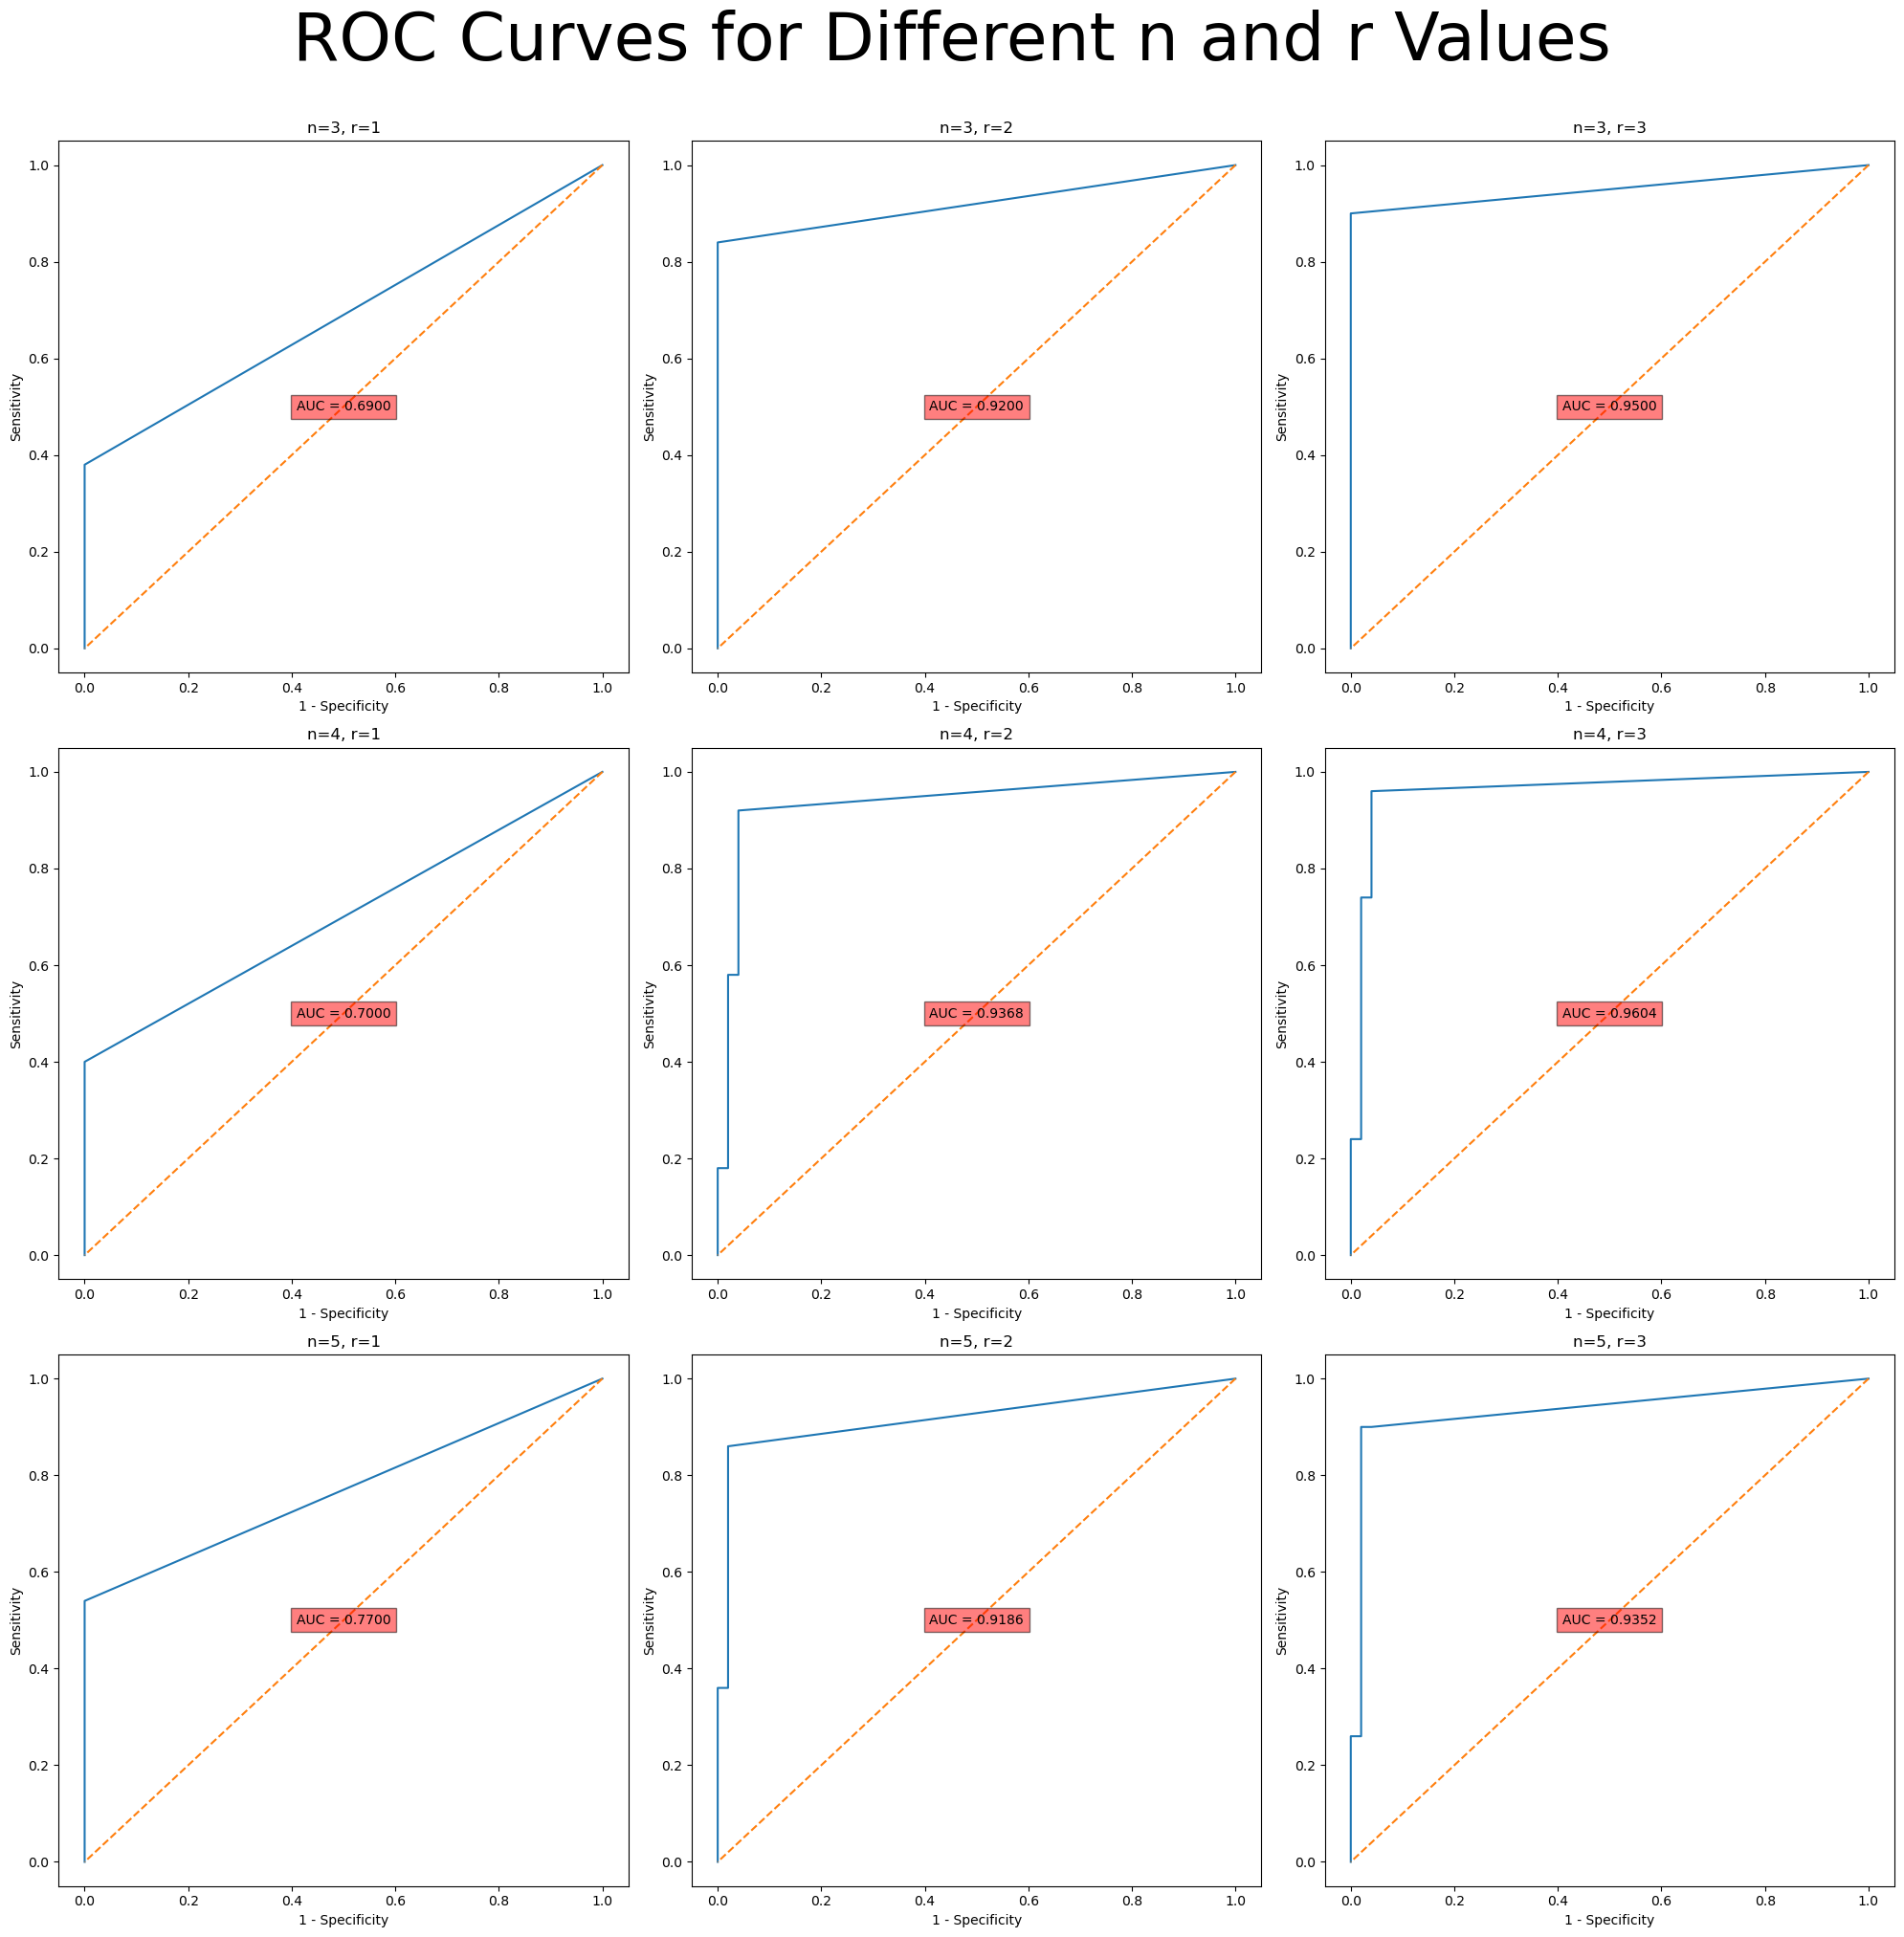

In [19]:
# Parameter Setup
n_values = [3, 4, 5]
r_values = [1, 2, 3]
test_set_nr = 1  

# Result Tracking
all_auc_scores = []  # Stores AUC scores for each (n, r) combination

# Grid Search
fig, axs = plt.subplots(len(n_values), len(r_values), figsize=(20, 20))  # Adjust subplot size if needed
plot_nr = 0  # Counter for tracking subplot positions 

for n in n_values:
    for r in r_values:
        # Pre-process the training data
        train_file = f'{INPUT_PATH}syscalls/snd-cert/snd-cert.train' #change / to \\ for Windows
        preprocessed_train_file = 'snd-cert_preprocessed.train'
        train_chunks = extract_train_data(train_file, preprocessed_train_file, chunk_length = n)

        # Pre-process the test data
        test_file = f'{INPUT_PATH}syscalls/snd-cert/snd-cert.{test_set_nr}.test' #change / to \\ for Windows
        label_file = f'{INPUT_PATH}syscalls/snd-cert/snd-cert.{test_set_nr}.labels' #change / to \\ for Windows
        test_chunks, syscall_ids, labels = extract_test_data(test_file, label_file, chunk_length = n)

        # Define training command
        training_command = f"java -jar negsel2.jar -alphabet file://syscalls/snd-cert/snd-cert.alpha -self {preprocessed_train_file} -n {n} -r {r} -c -l"

        # Compute the mean anomaly score for each system call
        mean_predictions = []
        for i in range(max(syscall_ids)+1):
            # Select all chunks belonging to a single system call
            selected_chunks = test_chunks[syscall_ids == i]

            # Save selected chunks to a file, one chunk per line, such that it can be used as input for negative selection
            with open(f'{INPUT_PATH}test.test','w') as file:
                file.write('\n'.join(selected_chunks))

            # Perform negative selection
            pred_raw = run_java_command(f"{training_command} < test.test")
            pred = list(map(float, pred_raw.split()))

            # Compute average anomaly score of that line
            mean_predictions.append(np.mean(pred))


        #Get the sensitivity and specificity
        sensitivity, specificity = calculate_sensitivity_specificity_linux(mean_predictions, labels)

        #Calculate and store the AUC
        auc_score = calculate_AUC(np.asarray(specificity), sensitivity) 
        print(f"AUC score: {auc_score:.2f}")
        all_auc_scores.append(auc_score) 

        # Plot ROC Curve on Subplot
        row = plot_nr // len(r_values)
        col = plot_nr % len(r_values)
        
        axs[row, col].plot(1 - np.asarray(specificity), sensitivity)
        axs[row, col].plot(1-np.asarray(specificity), 1-np.asarray(specificity), '--')
        axs[row, col].set_xlabel("1 - Specificity")
        axs[row, col].set_ylabel("Sensitivity")
        axs[row, col].set_title(f"n={n}, r={r}")
        axs[row, col].text(0.5, 0.5, f"AUC = {auc_score:.4f}", horizontalalignment='center', verticalalignment='center', transform=axs[row, col].transAxes, bbox=dict(facecolor='red', alpha=0.5))

        plot_nr += 1

# Overall plot settings
fig.suptitle('ROC Curves for Different n and r Values', y = 0.99, size = 50)
plt.tight_layout()  # Helps prevent labels from overlapping
plt.savefig("syscalls_grid_search2.png")  # Save the combined figure
plt.show()